In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
dt1=pd.read_csv("./heart_statlog_cleveland_hungary_final.csv")
dt1.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
dt1.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [5]:
# renaming
dt1.columns = ['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

dt1.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


<h4 style="color:Red;">1. Age</h4>
Age in Years.


<h4 style="color:Red;">2. Gender</h4>
<h5 style="color:green;">1 = male, 0= female;</h5>



<h4 style="color:Red;">3. Chest pain type</h4>

<h5 style="color:green;">
Value 1: typical angina.
 Value 2: atypical angina.
 Value 3: non-anginal pain.
 Value 4: asymptomatic</h5>

Typical Angina: This refers to chest pain or discomfort that is consistent with what is typically experienced by individuals with coronary artery disease. It's often described as a feeling of pressure, tightness, or squeezing in the chest. The pain may radiate to the arms, shoulders, neck, jaw, or back. It typically occurs during physical exertion or emotional stress and is relieved by rest or medication (such as nitroglycerin).

Atypical Angina: This refers to chest pain or discomfort that does not fit the typical pattern of angina. It may have different characteristics or occur under different circumstances than typical angina. Atypical angina may still be related to cardiac issues, but the symptoms may be less specific or more variable.

Non-Anginal Pain: This refers to chest pain or discomfort that is not caused by coronary artery disease. It could be due to other causes such as musculoskeletal issues, gastrointestinal problems, respiratory conditions, or anxiety. While it may not be related to the heart, it's still important to evaluate and address the underlying cause.

Asymptomatic: This means the absence of chest pain or discomfort. However, it's worth noting that some individuals with significant heart issues, such as silent ischemia (lack of oxygen to the heart muscle without symptoms), may not experience chest pain despite having a serious condition.

Typical Angina > Atypical Angina > Non-Anginal Pain > Asymptomatic.

<h4 style="color: Red"> 4. Resting Blood Pressure (in mm Hg)</h4>
Resting blood pressure (BP) is typically measured in millimeters of mercury (mm Hg). When you see a blood pressure reading, it's usually expressed as two numbers: systolic pressure over diastolic pressure, measured in mm Hg.
<h5 style="color:green;">-Here only systolic pressure is given</h5>

<h4 style="color: Red"> 5. cholesterol (mg/dL) </h4>
Serum cholesterol levels are typically measured in milligrams per deciliter (mg/dL) in most countries, including the United States.

Cholesterol levels can be classified into different categories:

<h5 style="color: Green">Desirable</h5>: Total cholesterol less than 200 mg/dL
<h5 style="color: Green">Borderline high</h5>: Total cholesterol between 200-239 mg/dL
<h5 style="color: Green">High</h5>: Total cholesterol 240 mg/dL and above


<h4 style="color: Red"> 6. Fasting Blood sugar </h4>
Fasting blood sugar (FBS) refers to the level of glucose in the bloodstream after a period of fasting, typically overnight.

<h5 style="color: Green">(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</h5>

<h4 style="color: Red"> 7. rest_ecg </h4>
A resting electrocardiogram (ECG or EKG) is a non-invasive test that records the electrical activity of your heart while you are at rest. 


Value 0: normal.

Value 1: having ST-T wave abnormality (T wave inversionsand/or ST elevation or depression of > 0.05 mV).

Value 2: showing probable or definite left ventricularhypertrophy by Estes' criteria.

Value 1 > value 2 > value 0


<h4 style="color: Red">8. Max_heart_rate_achieved</h4>

71–202
<h5 style="color: Green">Formula= 220 - age</h5>
The maximum heart rate (MHR) achieved during exercise is an important indicator of cardiovascular fitness and exercise intensity. 

<h4 style="color: Red">9. exercise_induced_angina</h4>
<h5 style="color: Green">1- Yes, 0-No</h5>
Exercise-induced angina refers to chest pain or discomfort that occurs during physical activity or exercise.


<h4 style="color: Red">10. st_depression</h4>
Indicating the extent of abnormality detected during cardiac stress testing. 

If ST depression is present, it is typically less than 1 mm in healthy individuals.

Increase ST depression reduce heart rate

<h4 style="color: Red">11. st_slope</h4>
The slope of the peak exercise ST segment is an important characteristic observed during exercise stress testing, particularly on the electrocardiogram (ECG) tracing.
<h5 style="color: Green">
Value 1: upsloping
Value 2: flat
Value 3: downsloping</h5>
 The <h5 style="color: Green">downsloping ST segment </h5> is generally considered to be more indicative of myocardial ischemia and is associated with a higher risk in cardiovascular health.

<h4 style="color: Red">12. Target</h4>
 1 = heart disease, 0 = Normal

In [6]:
dt1.isna().sum()

age                        0
gender                     0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

In [7]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1190 non-null   int64  
 1   gender                   1190 non-null   int64  
 2   chest_pain_type          1190 non-null   int64  
 3   resting_blood_pressure   1190 non-null   int64  
 4   cholesterol              1190 non-null   int64  
 5   fasting_blood_sugar      1190 non-null   int64  
 6   rest_ecg                 1190 non-null   int64  
 7   max_heart_rate_achieved  1190 non-null   int64  
 8   exercise_induced_angina  1190 non-null   int64  
 9   st_depression            1190 non-null   float64
 10  st_slope                 1190 non-null   int64  
 11  target                   1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


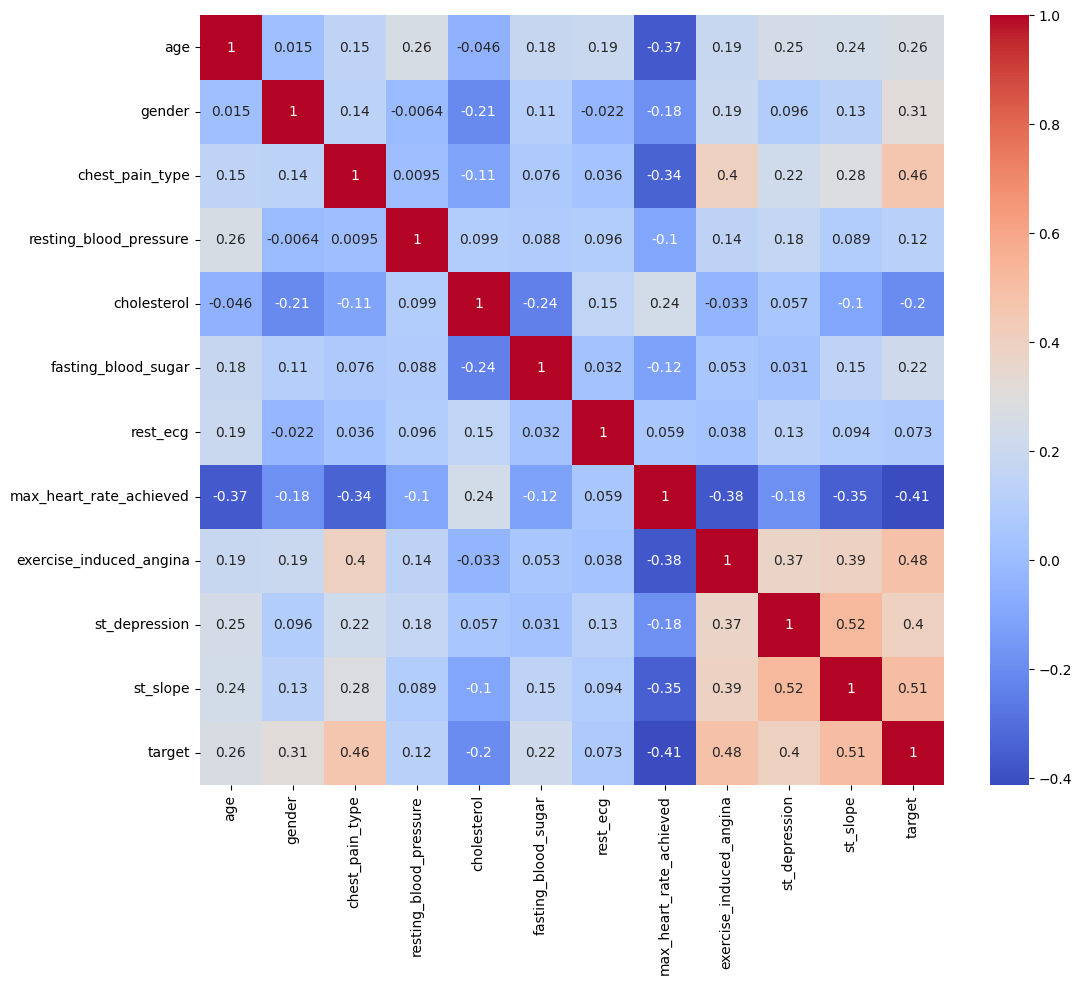

In [9]:
correlation_matrix = dt1.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('./Actual_correlation_heatmap_1190.png')

<h3 style="color: Red"> Outlier Check </h3>

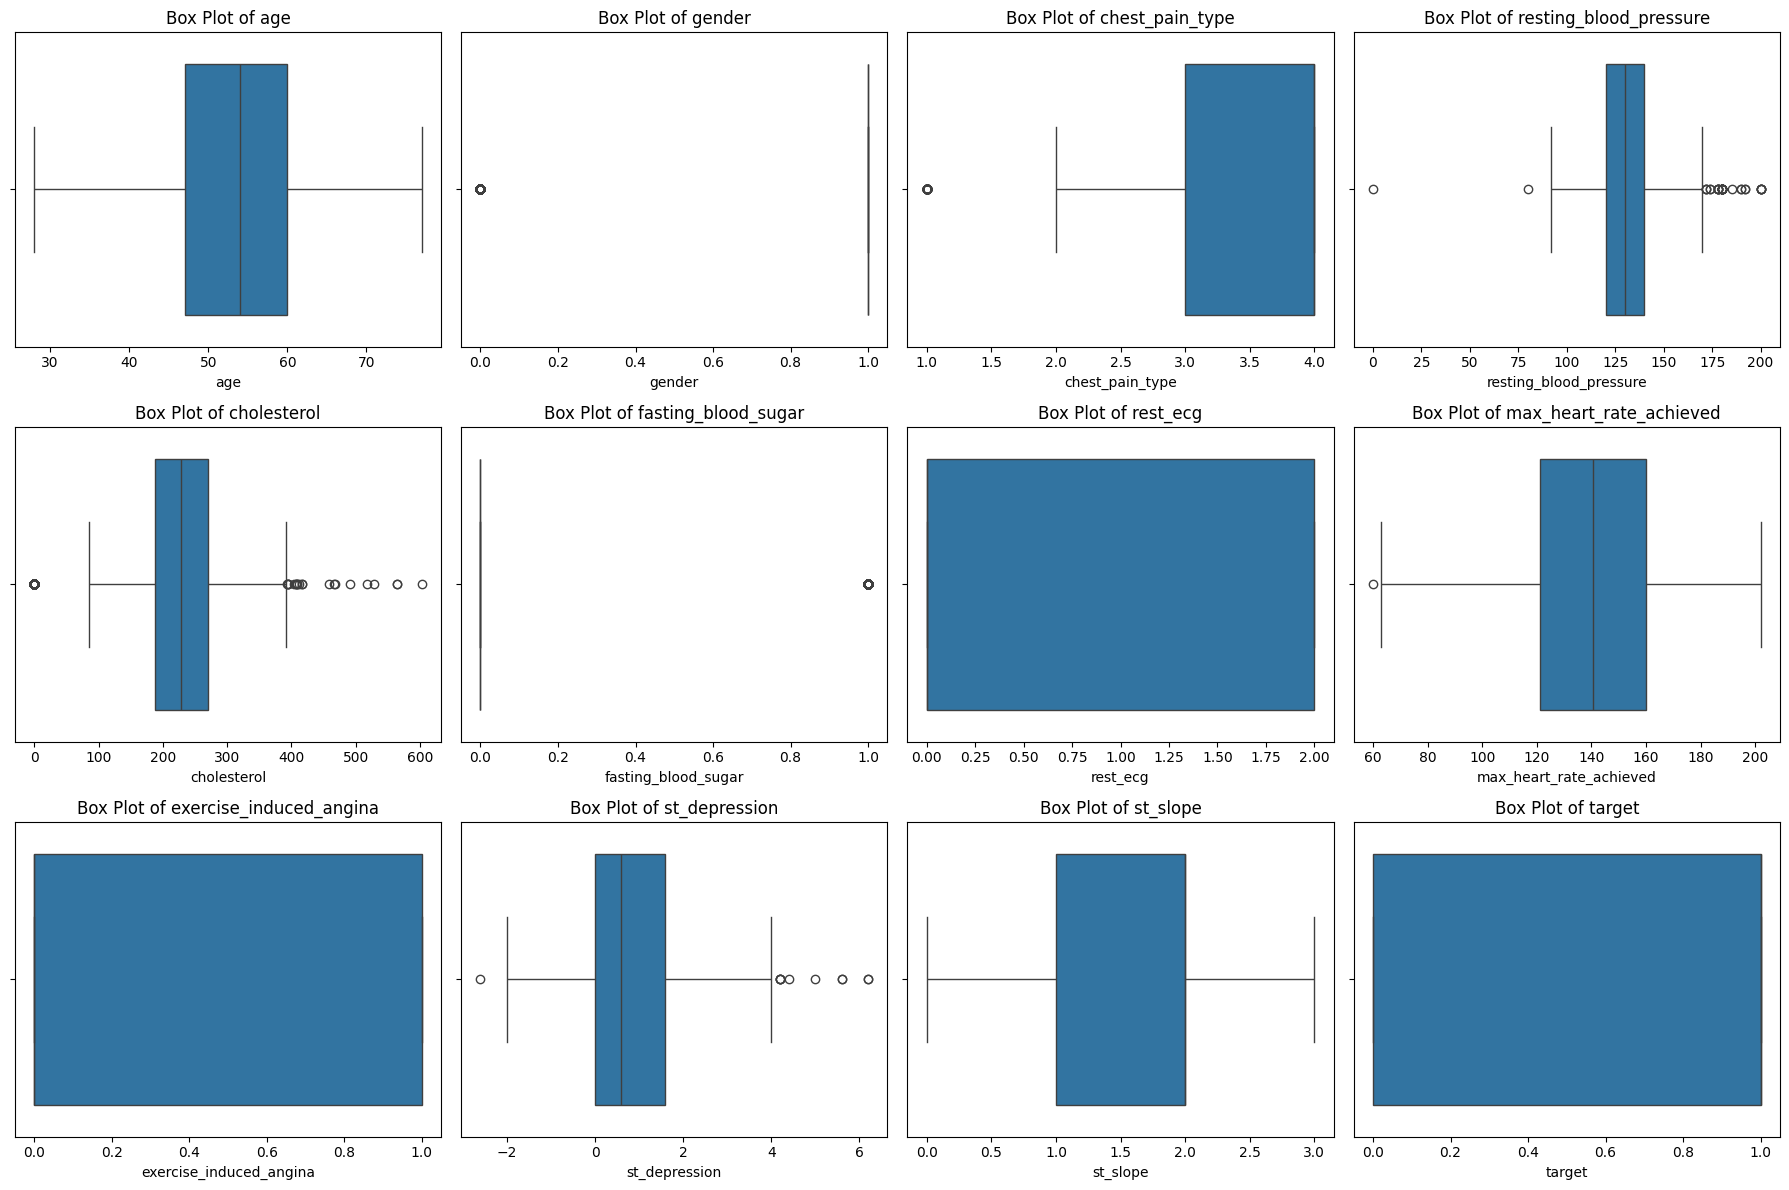

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each feature column and create box plots
for i, column in enumerate(dt1.columns):
    sns.boxplot(x=dt1[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()